In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import hvplot.pandas
import pandas as pd
import requests
import scipy.stats as st
import os 
import csv
#from api_keys import geoapify_key
#from api_keys import weather_api_key
# File to Load 
CLEAN_CSV_PATH = os.path.join("filtered_database.csv")

In [2]:
#Read File
clean_df = pd.read_csv(CLEAN_CSV_PATH)
clean_df.head()

,CBSA,CBSA_Name,CBSA_POP,CBSA_EMP,CBSA_WRK,Perc_Local_wrk,Perc_Local_wrk_Range,Ac_Total,Ac_Unpr,P_WrkAge,...,R_MedWageWk,R_HiWageWk,TotEmp,D1B,D1C,D4A,D5AR,NatWalkInd,levels of walkability,Percentage_Range
0,35620.0,"New York-Newark-Jersey City, NY-NJ-PA",19318471,9159786,8946175,46.31,26-50%,51.444490,50.313740,0.705,...,120,181,11,26.791886,0.218628,962.92,661739,10.500000,below average walkable,26-50%
1,35620.0,"New York-Newark-Jersey City, NY-NJ-PA",19318471,9159786,8946175,46.31,26-50%,1025.230008,960.425575,0.560,...,128,653,282,1.632610,0.293620,944.15,140212,9.500000,below average walkable,26-50%
2,35620.0,"New York-Newark-Jersey City, NY-NJ-PA",19318471,9159786,8946175,46.31,26-50%,1423.857411,1252.374073,0.557,...,217,473,4012,1.484381,3.203516,839.54,158876,13.000000,above average walkable,26-50%
3,35620.0,"New York-Newark-Jersey City, NY-NJ-PA",19318471,9159786,8946175,46.31,26-50%,485.497632,433.369860,0.630,...,375,908,210,8.948476,0.484575,-99999.00,153467,5.833333,below average walkable,26-50%
4,35620.0,"New York-Newark-Jersey City, NY-NJ-PA",19318471,9159786,8946175,46.31,26-50%,148.564674,147.595085,0.626,...,91,315,194,4.674952,1.314407,968.29,278458,14.666667,above average walkable,26-50%


In [3]:
#Caculate % of employment
clean_df['Perc_Local_emp'] = (clean_df['CBSA_EMP'] / clean_df['CBSA_POP'] * 100).round(2)

# Find the index of the 'CBSA_EMP' column
emp_column_index = clean_df.columns.get_loc('CBSA_EMP')

# Insert the 'Perc_Local_emp' column after the 'CBSA_EMP' column
clean_df.insert(emp_column_index + 1, 'Perc_Local_emp', clean_df.pop('Perc_Local_emp'))


In [4]:
#Validate State Names
total_CBSA = clean_df["CBSA_Name"].unique()
total_CBSA



array(['New York-Newark-Jersey City, NY-NJ-PA', 'Elmira, NY',
       'Buffalo-Cheektowaga, NY', 'Binghamton, NY', 'Rochester, NY',
       'Gloversville, NY', 'Albany-Schenectady-Troy, NY',
       'Glens Falls, NY', 'Olean, NY', 'Oneonta, NY', 'Batavia, NY',
       'Poughkeepsie-Newburgh-Middletown, NY', 'Cortland, NY',
       'Malone, NY', 'Amsterdam, NY', 'Utica-Rome, NY', 'Corning, NY',
       'Syracuse, NY', 'Kingston, NY', 'Plattsburgh, NY',
       'Watertown-Fort Drum, NY', 'Ogdensburg-Massena, NY', 'Ithaca, NY',
       'Seneca Falls, NY', 'Auburn, NY', 'Hudson, NY',
       'Jamestown-Dunkirk-Fredonia, NY'], dtype=object)

In [5]:
#Employment Select columns
Employment_data= clean_df[["CBSA_Name","CBSA_POP","CBSA_EMP","Perc_Local_emp","CBSA_WRK","Perc_Local_wrk","R_LowWageWk","R_MedWageWk","R_HiWageWk","NatWalkInd"]]
Employment_data.head()

,CBSA_Name,CBSA_POP,CBSA_EMP,Perc_Local_emp,CBSA_WRK,Perc_Local_wrk,R_LowWageWk,R_MedWageWk,R_HiWageWk,NatWalkInd
0,"New York-Newark-Jersey City, NY-NJ-PA",19318471,9159786,47.41,8946175,46.31,84,120,181,10.500000
1,"New York-Newark-Jersey City, NY-NJ-PA",19318471,9159786,47.41,8946175,46.31,151,128,653,9.500000
2,"New York-Newark-Jersey City, NY-NJ-PA",19318471,9159786,47.41,8946175,46.31,165,217,473,13.000000
3,"New York-Newark-Jersey City, NY-NJ-PA",19318471,9159786,47.41,8946175,46.31,280,375,908,5.833333
4,"New York-Newark-Jersey City, NY-NJ-PA",19318471,9159786,47.41,8946175,46.31,92,91,315,14.666667


In [6]:
#Group by CBSA
Employment_Gb_CBSA = Employment_data.groupby('CBSA_Name')
                                      

In [7]:
#Finding Unique for the Group By
MAX_COLUMNS = ['CBSA_POP','CBSA_EMP','Perc_Local_emp','CBSA_WRK','Perc_Local_wrk']
Employment_Max_df = Employment_Gb_CBSA.max()[MAX_COLUMNS]
print(Employment_Max_df.shape)
Employment_Max_df.head()

(27, 5)


,CBSA_POP,CBSA_EMP,Perc_Local_emp,CBSA_WRK,Perc_Local_wrk
CBSA_Name,,,,,
"Albany-Schenectady-Troy, NY",880481,447103,50.78,419749,47.67
"Amsterdam, NY",49426,18259,36.94,19904,40.27
"Auburn, NY",77868,24921,32.00,34908,44.83
"Batavia, NY",58112,21916,37.71,27630,47.55
"Binghamton, NY",243447,100147,41.14,104003,42.72


In [8]:
#Suming Unique Columns
SUM_COLUMNS= ['R_LowWageWk','R_MedWageWk','R_HiWageWk']
Employment_Sum_df = Employment_Gb_CBSA.sum()[SUM_COLUMNS]
print(Employment_Sum_df.shape)
Employment_Sum_df.head()

(27, 3)


,R_LowWageWk,R_MedWageWk,R_HiWageWk
CBSA_Name,,,
"Albany-Schenectady-Troy, NY",93070,118712,207967
"Amsterdam, NY",4703,7505,7696
"Auburn, NY",8500,11576,14832
"Batavia, NY",6633,9449,11548
"Binghamton, NY",25373,36202,42428


In [9]:
#Finding Mean Columns
MEAN_COLUMNS= ['NatWalkInd']
Employment_Mean_df = Employment_Gb_CBSA.mean()[MEAN_COLUMNS]
print(Employment_Mean_df.shape)
Employment_Mean_df.head()

(27, 1)


,NatWalkInd
CBSA_Name,
"Albany-Schenectady-Troy, NY",10.129851
"Amsterdam, NY",5.920635
"Auburn, NY",7.745614
"Batavia, NY",5.812865
"Binghamton, NY",6.900937


In [10]:
#Validating
Employment_Mean_df['NatWalkInd'].describe()

count    27.000000
mean      7.257139
std       1.929263
min       5.440476
25%       5.929067
50%       6.489362
75%       7.712343
max      12.582974
Name: NatWalkInd, dtype: float64

In [11]:
#grouping all the individual columns
Grouped_CBSA = pd.concat([Employment_Max_df, Employment_Sum_df, Employment_Mean_df], axis="columns")
print(Grouped_CBSA.shape)
Grouped_CBSA.head()

(27, 9)


,CBSA_POP,CBSA_EMP,Perc_Local_emp,CBSA_WRK,Perc_Local_wrk,R_LowWageWk,R_MedWageWk,R_HiWageWk,NatWalkInd
CBSA_Name,,,,,,,,,
"Albany-Schenectady-Troy, NY",880481,447103,50.78,419749,47.67,93070,118712,207967,10.129851
"Amsterdam, NY",49426,18259,36.94,19904,40.27,4703,7505,7696,5.920635
"Auburn, NY",77868,24921,32.00,34908,44.83,8500,11576,14832,7.745614
"Batavia, NY",58112,21916,37.71,27630,47.55,6633,9449,11548,5.812865
"Binghamton, NY",243447,100147,41.14,104003,42.72,25373,36202,42428,6.900937


In [12]:
#import Lat and long file
Location = pd.read_csv('county_lat_long.csv')
Location.head()

,CBSA_Name,Lat,Lng
0,"Albany-Schenectady-Troy, NY",42.745522,-73.816521
1,"Amsterdam, NY",42.937744,-74.190353
2,"Auburn, NY",42.931782,-76.566139
3,"Batavia, NY",42.996910,-78.186028
4,"Binghamton, NY",42.098701,-75.912537


In [13]:
#Caculate % of low  Wage Workers
Grouped_CBSA ['%_Low_Wage_Workers'] = (Grouped_CBSA ['R_LowWageWk'] / Grouped_CBSA ['CBSA_EMP'] * 100).round(2)

# Find the index of the 'CBSA_EMP' column
low_column_index = Grouped_CBSA .columns.get_loc('R_LowWageWk')

# Insert the 'Perc_Local_emp' column after the 'CBSA_EMP' column
Grouped_CBSA .insert(low_column_index + 1, '%_Low_Wage_Workers', Grouped_CBSA .pop('%_Low_Wage_Workers'))
#_______________________________________________________________________

#Caculate % of low  Wage Workers
Grouped_CBSA ['%_Med_Wage_Workers'] = (Grouped_CBSA ['R_MedWageWk'] / Grouped_CBSA ['CBSA_EMP'] * 100).round(2)

# Find the index of the 'CBSA_EMP' column
med_column_index = Grouped_CBSA .columns.get_loc('R_MedWageWk')

# Insert the 'Perc_Local_emp' column after the 'CBSA_EMP' column
Grouped_CBSA .insert(med_column_index + 1, '%_Med_Wage_Workers', Grouped_CBSA .pop('%_Med_Wage_Workers'))

#_______________________________________________________________________

#Caculate % of low  Wage Workers
Grouped_CBSA ['%_High_Wage_Workers'] = (Grouped_CBSA ['R_HiWageWk'] / Grouped_CBSA ['CBSA_EMP'] * 100).round(2)

# Find the index of the 'CBSA_EMP' column
high_column_index = Grouped_CBSA .columns.get_loc('R_HiWageWk')

# Insert the 'Perc_Local_emp' column after the 'CBSA_EMP' column
Grouped_CBSA .insert(high_column_index + 1, '%_High_Wage_Workers', Grouped_CBSA .pop('%_High_Wage_Workers'))

In [14]:
#Combining the data all together
combined_employment_data = pd.merge(Grouped_CBSA,Location, on="CBSA_Name")
combined_employment_data.head()

,CBSA_Name,CBSA_POP,CBSA_EMP,Perc_Local_emp,CBSA_WRK,Perc_Local_wrk,R_LowWageWk,%_Low_Wage_Workers,R_MedWageWk,%_Med_Wage_Workers,R_HiWageWk,%_High_Wage_Workers,NatWalkInd,Lat,Lng
0,"Albany-Schenectady-Troy, NY",880481,447103,50.78,419749,47.67,93070,20.82,118712,26.55,207967,46.51,10.129851,42.745522,-73.816521
1,"Amsterdam, NY",49426,18259,36.94,19904,40.27,4703,25.76,7505,41.10,7696,42.15,5.920635,42.937744,-74.190353
2,"Auburn, NY",77868,24921,32.00,34908,44.83,8500,34.11,11576,46.45,14832,59.52,7.745614,42.931782,-76.566139
3,"Batavia, NY",58112,21916,37.71,27630,47.55,6633,30.27,9449,43.11,11548,52.69,5.812865,42.996910,-78.186028
4,"Binghamton, NY",243447,100147,41.14,104003,42.72,25373,25.34,36202,36.15,42428,42.37,6.900937,42.098701,-75.912537


In [15]:
%%capture --no-display
# Configure the map plot
map_plot_1 = combined_employment_data.hvplot.points(
    "Lng",
    "Lat",
    size="NatWalkInd",
    geo = True,
    tiles = "OSM",
    frame_width = 800,
    frame_height = 700,
    scale = 10,
    hover_cols=["%_Low_Wage_Workers", "%_Med_Wage_Workers","%_High_Wage_Workers"])

# Display the map
map_plot_1

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Lng,Lat]   (NatWalkInd,%_Low_Wage_Workers,%_Med_Wage_Workers,%_High_Wage_Workers)

In [16]:
%%capture --no-display
# Configure the map plot
map_plot_2 = combined_employment_data.hvplot.points(
    "Lng",
    "Lat",
    size="%_Med_Wage_Workers",
    geo = True,
    tiles = "OSM",
    frame_width = 800,
    frame_height = 700,
    scale = 5,
    hover_cols=["%_Low_Wage_Workers", "%_Med_Wage_Workers","%_High_Wage_Workers"])

# Display the map
map_plot_2

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Lng,Lat]   (%_Med_Wage_Workers,%_Low_Wage_Workers,%_High_Wage_Workers)

In [17]:
#Ploting Top
Sorted_df = combined_employment_data.sort_values('Perc_Local_emp',ascending=False).iloc[0:10]
Sorted_df.head()['Perc_Local_emp']

0     50.78
5     48.31
22    47.93
16    47.41
12    47.35
Name: Perc_Local_emp, dtype: float64

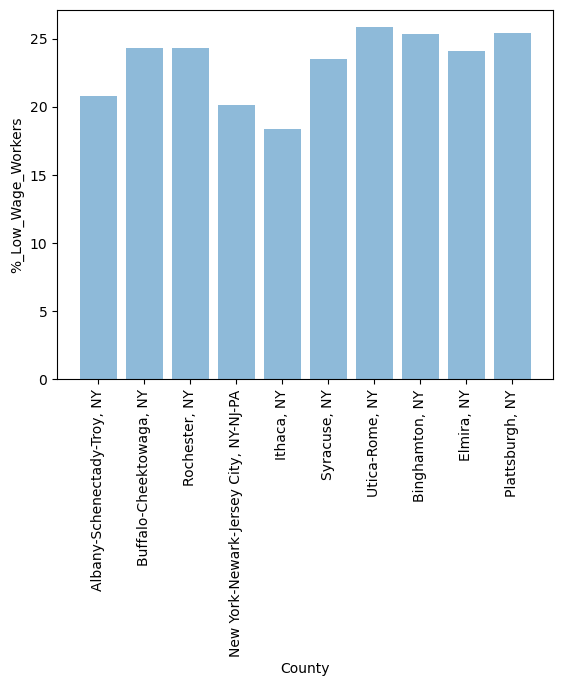

In [18]:
#Bar of %_Low_Wage_Workers
x_values=Sorted_df['CBSA_Name']
y_values=Sorted_df["%_Low_Wage_Workers"]
plt.bar(x_values, y_values, alpha=0.5, align="center")
plt.xticks(rotation=90)
plt.xlabel("County")
plt.ylabel("%_Low_Wage_Workers")
#plt.title(" % of Low Wage Works In The Top 10 Cities Ranked By Percent of Local Employment")
plt.show()

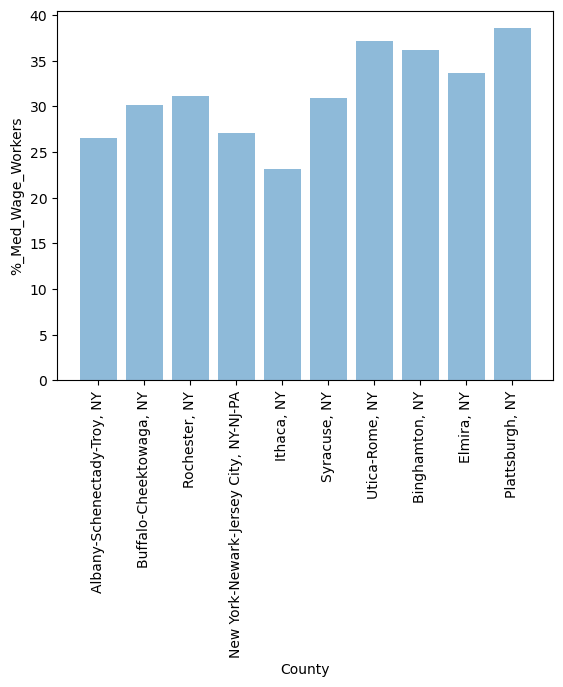

In [19]:
#Bar of %_Med_Wage_Workers
x_values=Sorted_df['CBSA_Name']
y_values=Sorted_df["%_Med_Wage_Workers"]
plt.bar(x_values, y_values, alpha=0.5, align="center")
plt.xticks(rotation=90)
plt.xlabel("County")
plt.ylabel("%_Med_Wage_Workers")
#plt.title(" % of Med Wage Works In The Top 10 Cities Ranked By Percent of Local Employment")
plt.show()

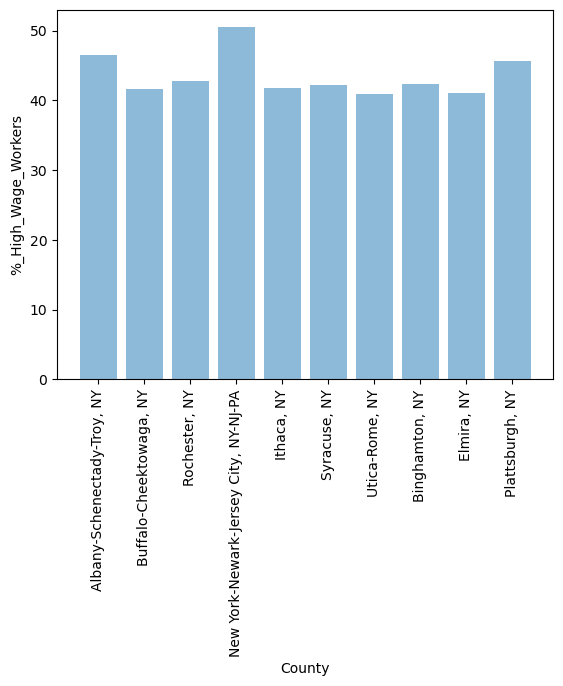

In [20]:
#Bar of %_High_Wage_Workers
x_values=Sorted_df['CBSA_Name']
y_values=Sorted_df["%_High_Wage_Workers"]
plt.bar(x_values, y_values, alpha=0.5, align="center")
plt.xticks(rotation=90)
plt.xlabel("County")
plt.ylabel("%_High_Wage_Workers")
#plt.title(" % of High Wage Works In The Top 10 Cities Ranked By Percent of Local Employment")
plt.show()


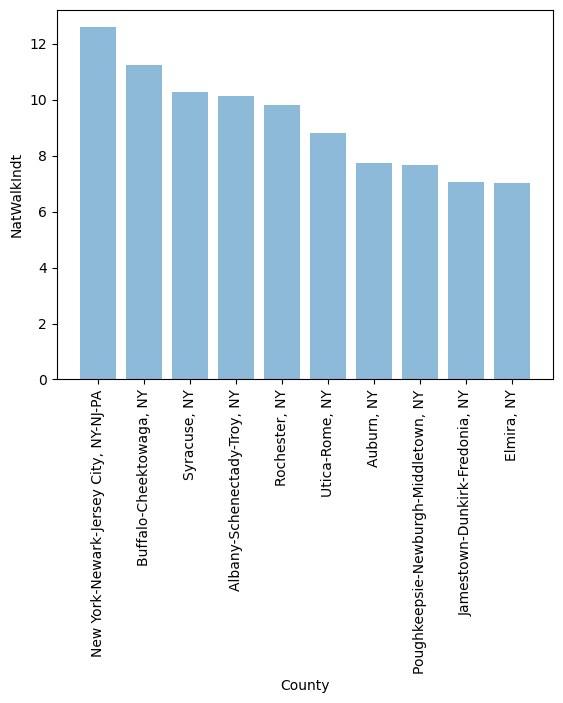

In [21]:
#Ploting Top
Sorted2_df = combined_employment_data.sort_values('NatWalkInd',ascending=False).iloc[0:10]
Sorted2_df.head()['NatWalkInd']

#Bar of Percent of Local Employment
x_values=Sorted2_df['CBSA_Name']
y_values=Sorted2_df['NatWalkInd']
plt.bar(x_values, y_values, alpha=0.5, align="center")
plt.xticks(rotation=90)
plt.xlabel("County")
plt.ylabel("NatWalkIndt")
plt.show()

The r-value is: 0.2134942359573206


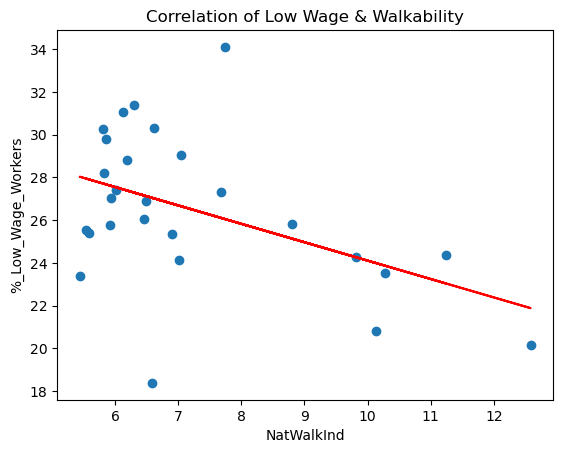

In [22]:
#Scatter Chart
x_values = combined_employment_data['NatWalkInd']
y_values = combined_employment_data['%_Low_Wage_Workers']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(50,40),fontsize=15,color="red")
plt.xlabel('NatWalkInd')
plt.ylabel('%_Low_Wage_Workers')
plt.title("Correlation of Low Wage & Walkability")
print(f"The r-value is: {rvalue**2}")
plt.show()

The r-value is: 0.3861324226000069


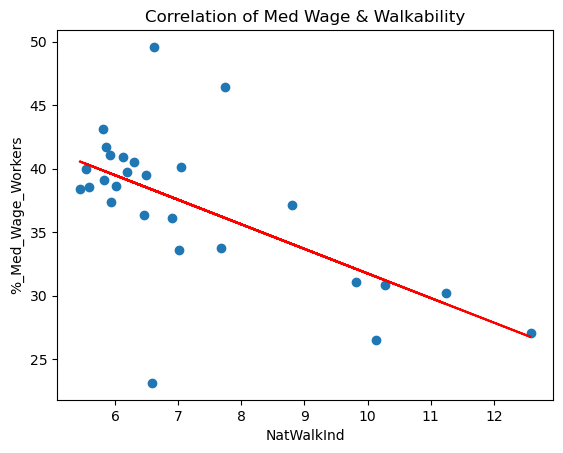

In [23]:
#Scatter Chart
x_values = combined_employment_data['NatWalkInd']
y_values = combined_employment_data['%_Med_Wage_Workers']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(50,40),fontsize=15,color="red")
plt.xlabel('NatWalkInd')
plt.ylabel('%_Med_Wage_Workers')
plt.title("Correlation of Med Wage & Walkability")
print(f"The r-value is: {rvalue**2}")
plt.show()

The r-value is: 0.0001136877924445528


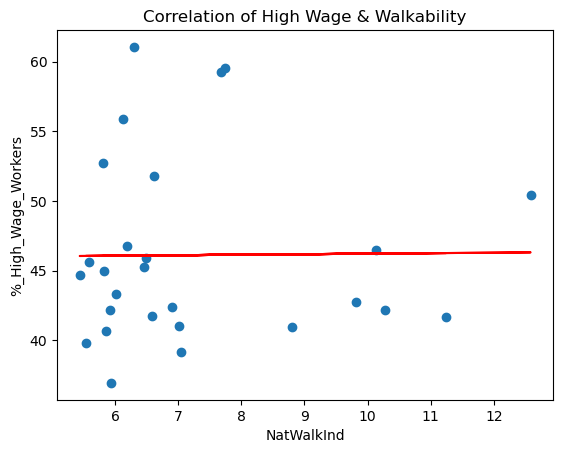

In [24]:
#Scatter Chart
x_values = combined_employment_data['NatWalkInd']
y_values = combined_employment_data['%_High_Wage_Workers']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(50,40),fontsize=15,color="red")
plt.xlabel('NatWalkInd')
plt.ylabel('%_High_Wage_Workers')
plt.title("Correlation of High Wage & Walkability")
print(f"The r-value is: {rvalue**2}")
plt.show()

The r-value is: 0.38141596132832667


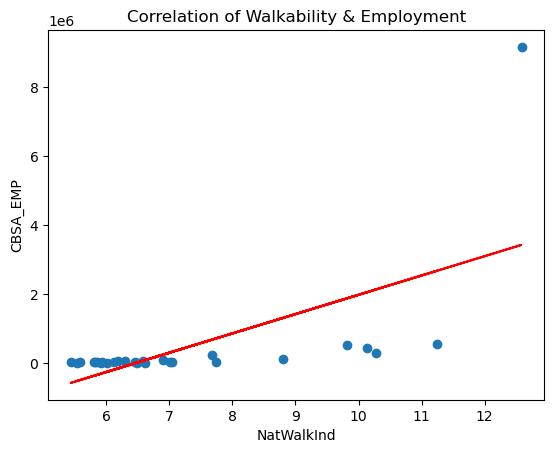

In [25]:
#Scatter Chart
x_values = combined_employment_data['NatWalkInd']
y_values = combined_employment_data['CBSA_EMP']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(50,40),fontsize=15,color="red")
plt.xlabel('NatWalkInd')
plt.ylabel('CBSA_EMP')
plt.title("Correlation of Walkability & Employment")
print(f"The r-value is: {rvalue**2}")
plt.show()

The r-value is: 0.38005766755450804


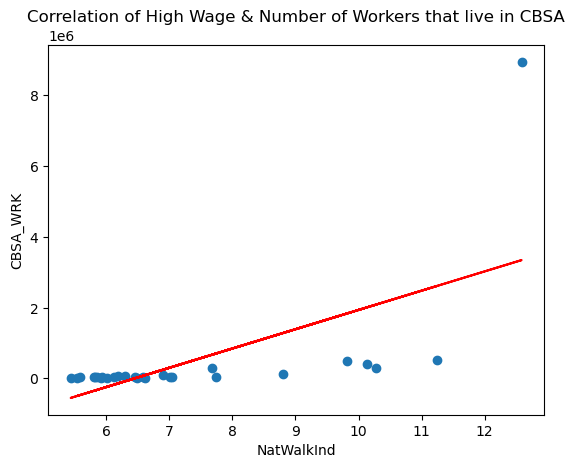

In [26]:
#Scatter Chart
x_values = combined_employment_data['NatWalkInd']
y_values = combined_employment_data['CBSA_WRK']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(50,40),fontsize=15,color="red")
plt.xlabel('NatWalkInd')
plt.ylabel('CBSA_WRK')
plt.title("Correlation of High Wage & Number of Workers that live in CBSA")
print(f"The r-value is: {rvalue**2}")
plt.show()

The r-value is: 0.5699551258803471


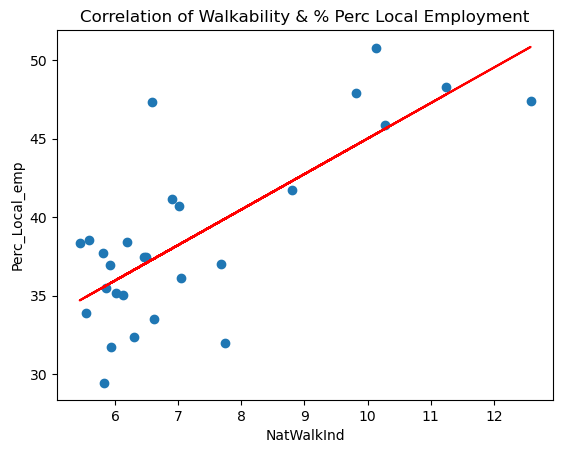

In [27]:
#Scatter Chart
x_values = combined_employment_data['NatWalkInd']
y_values = combined_employment_data['Perc_Local_emp']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(50,40),fontsize=15,color="red")
plt.xlabel('NatWalkInd')
plt.ylabel('Perc_Local_emp')
plt.title("Correlation of Walkability & % Perc Local Employment")
print(f"The r-value is: {rvalue**2}")
plt.show()